 Prepare a classification model using SVM for burned area



In [ ]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score



In [ ]:
from google.colab  import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [ ]:
import pandas as pd
import io
  
burnarea = pd.read_csv(io.BytesIO(uploaded["forestfires.csv"]))



In [ ]:
burnarea

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [ ]:
burnarea.drop('month',
  axis='columns', inplace=True)
burnarea.drop('day',
  axis='columns', inplace=True)

In [ ]:
burnarea.shape

(517, 29)

Missing values vs observed


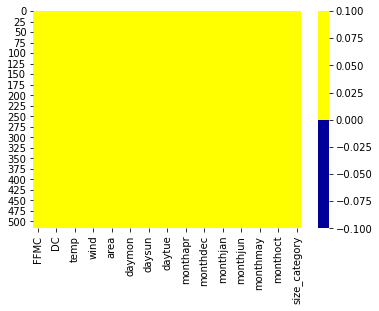

In [ ]:
import seaborn as sns
cols = burnarea.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(burnarea[cols].isnull(),
            cmap=sns.color_palette(colours))

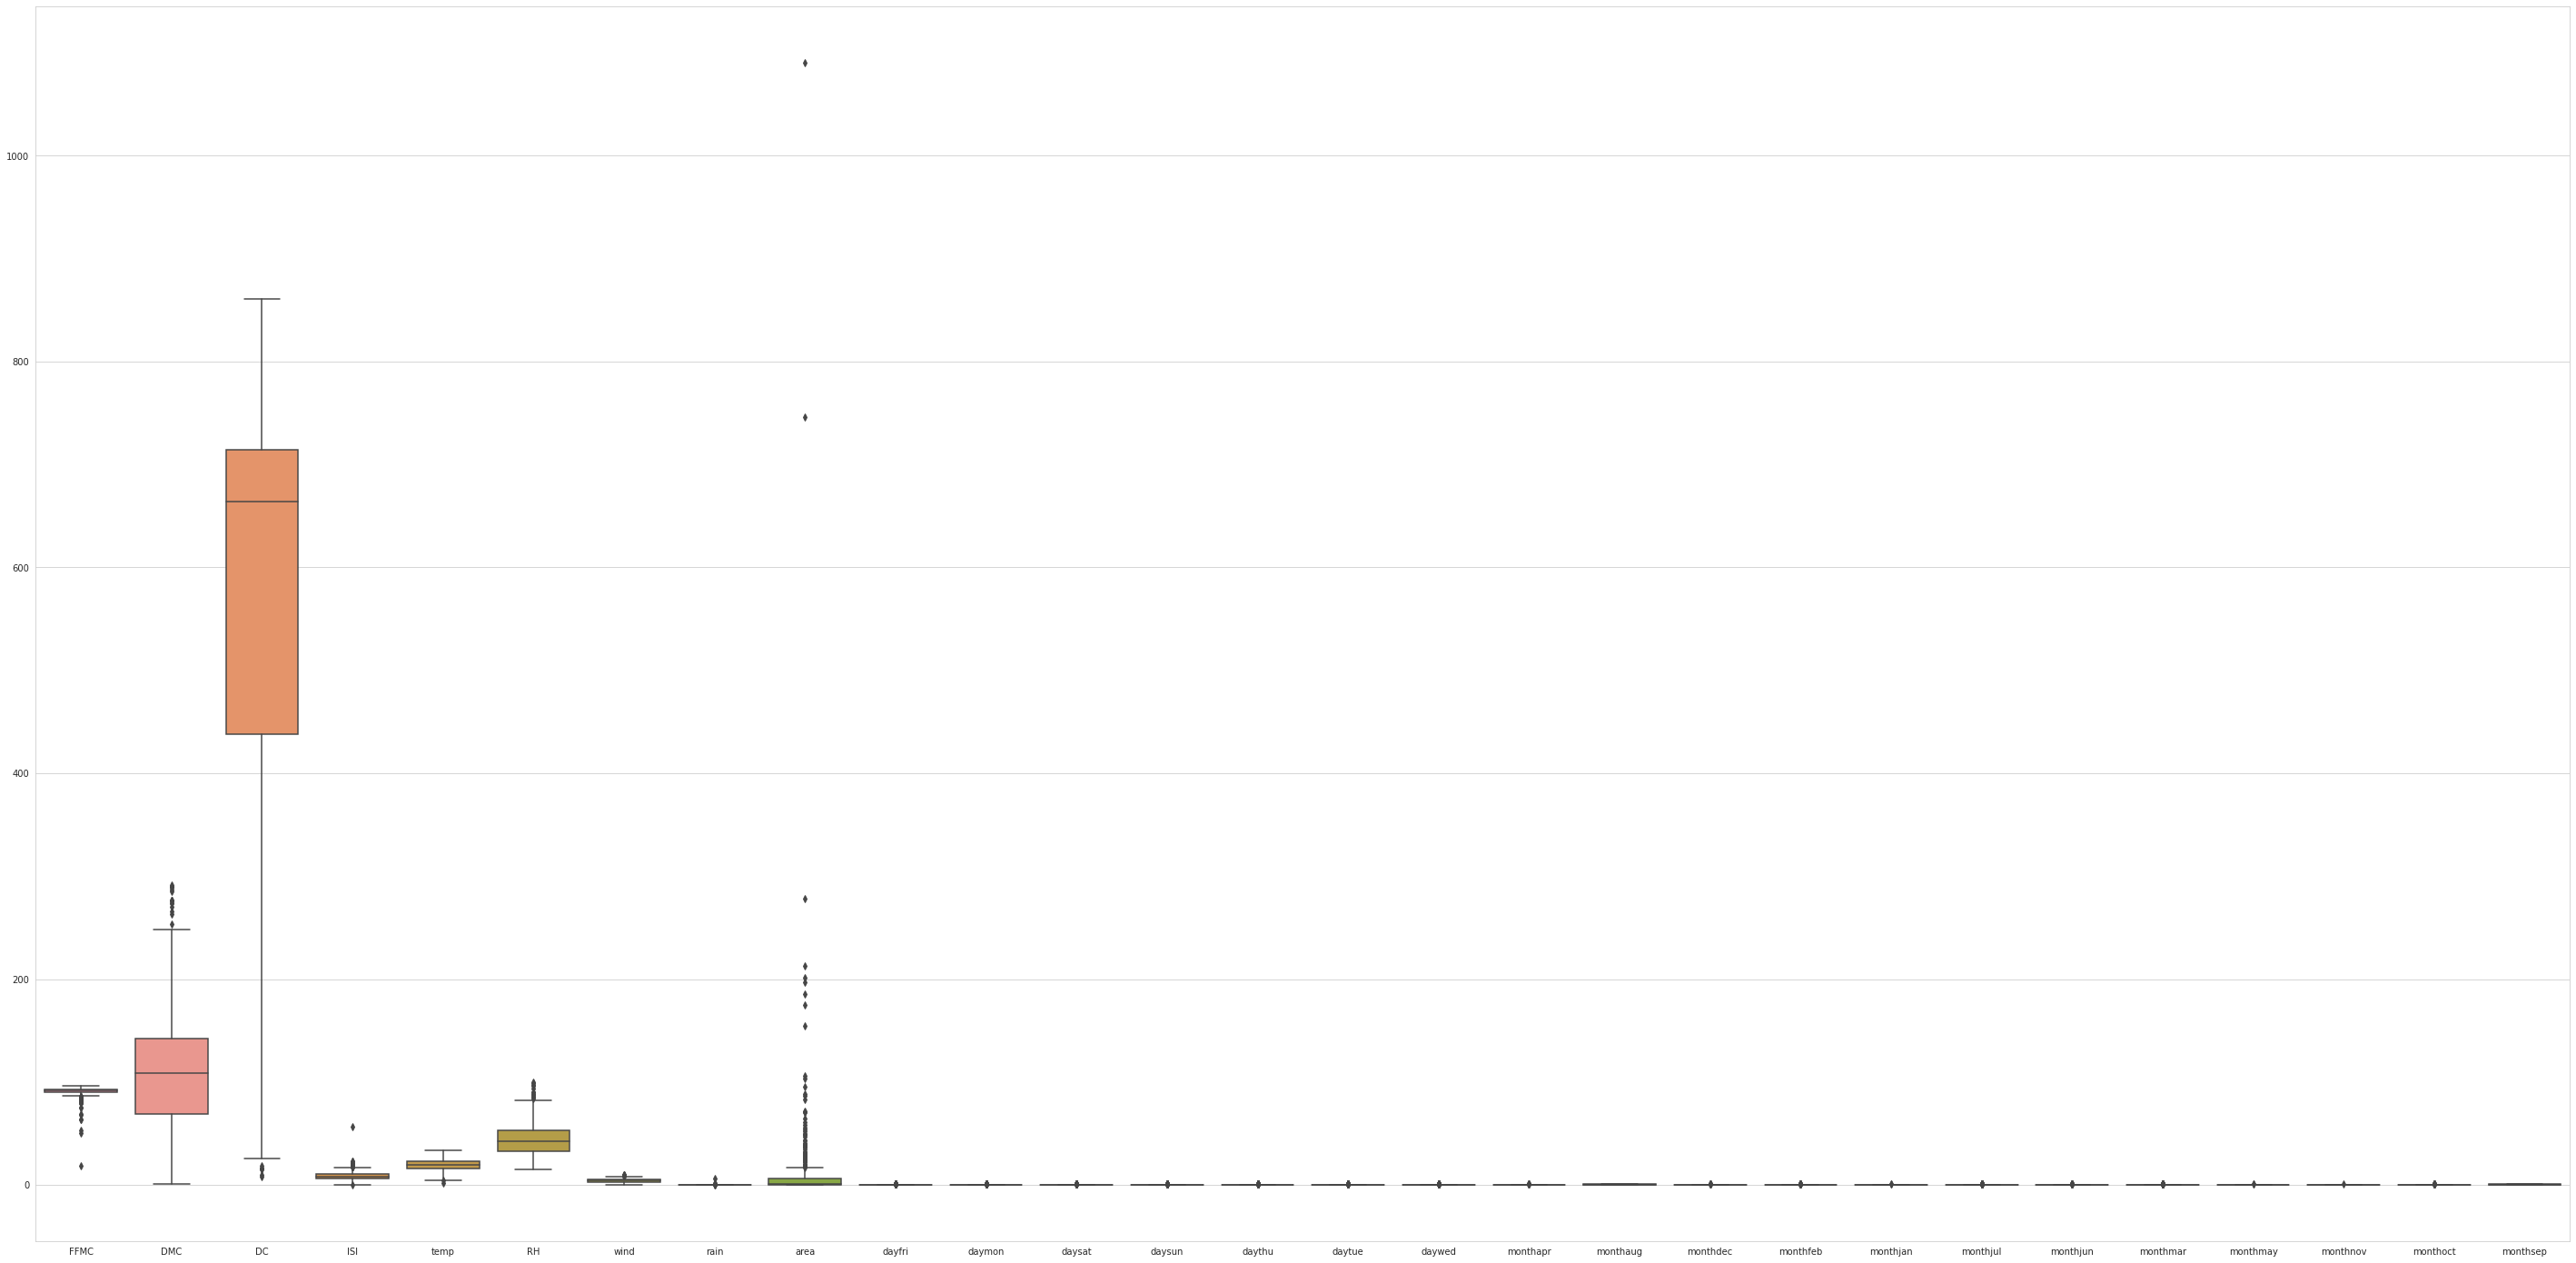

In [ ]:
# Draw a vertical boxplot grouped 
# by a categorical variable:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize']=(50,25)
sns.boxplot( data =burnarea)
		


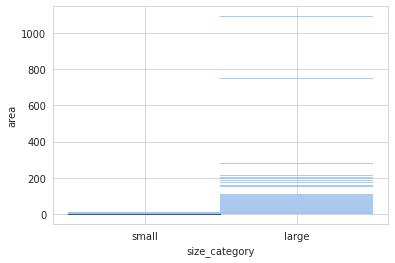

In [ ]:
sns.histplot(data=burnarea, x="size_category",y="area")

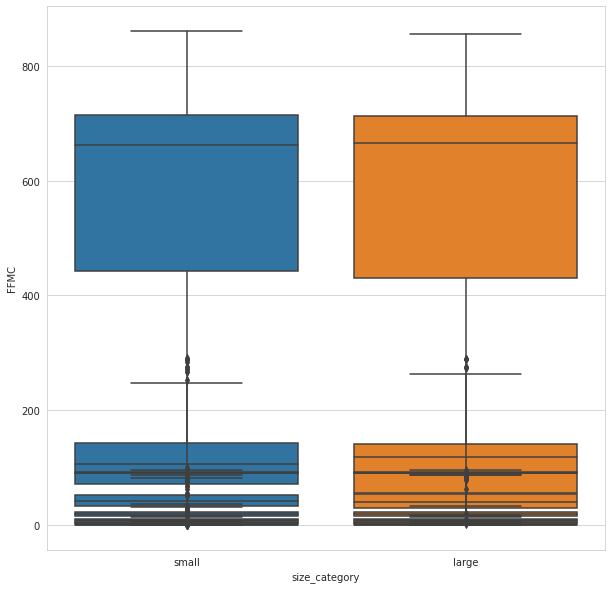

In [ ]:
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.rcParams['figure.figsize']=(10,10)

sns.boxplot(x =burnarea['size_category'], y = burnarea['rain'], data =burnarea)
sns.boxplot(x =burnarea['size_category'], y = burnarea['wind'], data =burnarea)
sns.boxplot(x =burnarea['size_category'], y = burnarea['temp'], data =burnarea)
sns.boxplot(x =burnarea['size_category'], y = burnarea['RH'], data =burnarea)
sns.boxplot(x =burnarea['size_category'], y = burnarea['ISI'], data =burnarea)
sns.boxplot(x =burnarea['size_category'], y = burnarea['DC'], data =burnarea)
sns.boxplot(x =burnarea['size_category'], y = burnarea['DMC'], data =burnarea)
sns.boxplot(x =burnarea['size_category'], y = burnarea['FFMC'], data =burnarea)


		
					

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
burnarea["size_category"] = labelencoder.fit_transform(burnarea["size_category"])


In [ ]:
burnarea

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
x=burnarea.iloc[:,0:28]
y=burnarea.iloc[:,-1]
xtest=x.head(155)
ytest=y.head(155)
xtrain=x.tail(300)
ytrain=y.tail(300)



In [ ]:
xtrain

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
217,88.6,91.8,709.9,7.1,12.4,73,6.3,0.0,30.32,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
218,92.9,133.3,699.6,9.2,19.4,19,1.3,0.0,31.72,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
219,90.1,39.7,86.6,6.2,15.2,27,3.1,0.0,31.86,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
220,90.2,99.6,631.2,6.3,16.2,59,3.1,0.0,32.07,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
221,93.3,141.2,713.9,13.9,18.6,49,3.6,0.0,35.88,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Grid Search CV

In [ ]:
clf =SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5],'C':[15,11,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(xtrain,ytrain)


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [15, 11, 0.001], 'gamma': [50, 5],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.6533333333333333)

In [ ]:
clf = SVC(C= 15, gamma = 50)
clf.fit(xtrain , ytrain)
y_pred = clf.predict(xtest)
acc = accuracy_score(ytest, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(ytest, y_pred)

Accuracy = 100.0


array([[155]])